# namedtuple

What is namedtuple in Python?

* namedtuple is a factory function available in the collections module that allows you to create simple classes whose instances are like standard Python tuples but also have names associated with each of their positions. This makes accessing elements more intuitive and improves code clarity.
* Think of it as creating a blueprint for a simple data container, where each slot in the container has a specific label.

Key Characteristics of namedtuple:

* Tuple-like: Instances of a namedtuple behave like regular tuples. You can access their elements by index (like color[0]).
* Named Attributes: Additionally, you can access elements by their assigned names using dot notation (like color.name). This is the primary advantage for readability.
* Immutable: Like regular tuples, namedtuple instances are immutable, meaning their values cannot be changed after creation.
* Memory-efficient: They are as memory-efficient as regular tuples.
* Hashable: Instances of namedtuple are hashable if all their elements are hashable, making them usable as keys in dictionaries and elements in sets.
* Readability: They make your code more self-documenting and easier to understand because the meaning of each element is explicit through its name.


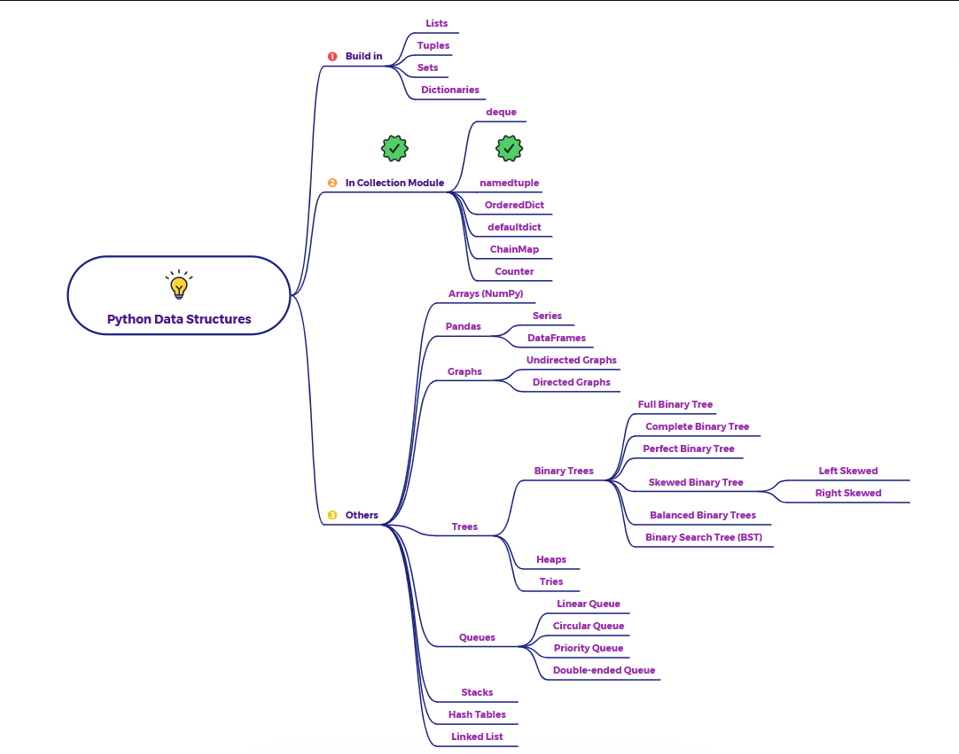

# 1. Define a Utility function to print highlighted characteristics

In [50]:
import collections

def highlight_characteristic(name, description, symbol='='):
    """Helper function to print highlighted characteristics."""
    print(f"\n{symbol*5} {name.upper()} {symbol*5}")
    print(description)
    print(f"{symbol*5} {name.upper()} {symbol*5}\n")

print("--- Python NamedTuple Data Structure: Product Inventory Record Example ---")

--- Python NamedTuple Data Structure: Product Inventory Record Example ---


In [51]:
# Creating the NamedTuple Type

highlight_characteristic(
    "Creating NamedTuple Type",
    "First, we define the structure (field names) for our namedtuple."
)

# Define a namedtuple type for a Product record
# Fields: product_id, name, price, stock, category
Product = collections.namedtuple('Product', ['product_id', 'name', 'price', 'stock', 'category'])
print(f"Namedtuple type 'Product' created with fields: {Product._fields}")
print(f"Type of Product: {type(Product)}\n")


===== CREATING NAMEDTUPLE TYPE =====
First, we define the structure (field names) for our namedtuple.
===== CREATING NAMEDTUPLE TYPE =====

Namedtuple type 'Product' created with fields: ('product_id', 'name', 'price', 'stock', 'category')
Type of Product: <class 'type'>



# 2. Tuple-like but with Named Fields & Ordered

* We define Product with specific field names ('product_id', 'name', etc.).
* Instances (laptop, mouse, book) are created by passing values for these fields.
* You can access values using either the field name (laptop.name) or the index (laptop[0]).
* Iteration (for field_value in laptop:) and index access confirm that the order of fields is preserved as defined.

In [52]:
# 1. Tuple-like but with Named Fields & Ordered

highlight_characteristic(
    "Tuple-like with Named Fields & Ordered",
    "Elements can be accessed by their defined field names (like an object attribute) "
    "or by their numerical index (like a regular tuple). The order of fields is preserved."
)

# Creating instances of Product records
laptop = Product('LPT101', 'High-Performance Laptop', 1200.50, 50, 'Electronics')
mouse = Product('MSE202', 'Ergonomic Wireless Mouse', 25.99, 200, 'Electronics')
book = Product('BOK303', 'Python Programming Guide', 45.00, 150, 'Books')

print(f"Laptop record: {laptop}")
print(f"Mouse record: {mouse}")

print("\nAccessing fields by name:")
print(f"Laptop Name: {laptop.name}")
print(f"Mouse Price: {mouse.price}")

print("\nAccessing fields by index (order is preserved):")
print(f"Laptop ID (index 0): {laptop[0]}")
print(f"Book Category (index 4): {book[4]}")

print("\nIterating through fields (order is preserved):")
for field_value in laptop:
    print(f"  {field_value}")


===== TUPLE-LIKE WITH NAMED FIELDS & ORDERED =====
Elements can be accessed by their defined field names (like an object attribute) or by their numerical index (like a regular tuple). The order of fields is preserved.
===== TUPLE-LIKE WITH NAMED FIELDS & ORDERED =====

Laptop record: Product(product_id='LPT101', name='High-Performance Laptop', price=1200.5, stock=50, category='Electronics')
Mouse record: Product(product_id='MSE202', name='Ergonomic Wireless Mouse', price=25.99, stock=200, category='Electronics')

Accessing fields by name:
Laptop Name: High-Performance Laptop
Mouse Price: 25.99

Accessing fields by index (order is preserved):
Laptop ID (index 0): LPT101
Book Category (index 4): Books

Iterating through fields (order is preserved):
  LPT101
  High-Performance Laptop
  1200.5
  50
  Electronics


# 3. Immutable Characteristic

* An attempt to reassign a field's value (e.g., laptop.price = ...) results in an AttributeError, explicitly demonstrating immutability.
* To "update" a namedtuple, you use the _replace() method, which returns a new namedtuple instance with the specified changes, leaving the original unchanged.


In [53]:
# 2. Immutable Characteristic

highlight_characteristic(
    "Immutable",
    "Once a namedtuple instance is created, its values cannot be changed."
)

print(f"Original Laptop record: {laptop}")
try:
    laptop.price = 1150.00 # Attempting to modify the price
except AttributeError as e:
    print(f"Error caught as expected: {e}")
    print("This confirms namedtuples are immutable - elements cannot be modified after creation.")

# To "change" a namedtuple, you must create a new instance (often using _replace)
updated_laptop = laptop._replace(price=1150.00, stock=49)
print(f"Updated Laptop record (new instance created): {updated_laptop}")
print(f"Original Laptop record remains: {laptop}\n") # Original is unchanged


===== IMMUTABLE =====
Once a namedtuple instance is created, its values cannot be changed.
===== IMMUTABLE =====

Original Laptop record: Product(product_id='LPT101', name='High-Performance Laptop', price=1200.5, stock=50, category='Electronics')
Error caught as expected: can't set attribute
This confirms namedtuples are immutable - elements cannot be modified after creation.
Updated Laptop record (new instance created): Product(product_id='LPT101', name='High-Performance Laptop', price=1150.0, stock=49, category='Electronics')
Original Laptop record remains: Product(product_id='LPT101', name='High-Performance Laptop', price=1200.5, stock=50, category='Electronics')



# 4. Allows Duplicates (in Values):

* product_A and product_B show that different records can have identical values for specific fields (e.g., both have 10.00 for price and 'Accessories' for category). The uniqueness constraint applies to the field names in the namedtuple definition, not the values within the instances.

In [54]:
# 3. Allows Duplicates (in Values) Characteristic

highlight_characteristic(
    "Allows Duplicates (in Values)",
    "Namedtuple allows duplicate values for its fields. Field names, however, must be unique."
)

# Products with same price and category
product_A = Product('A001', 'Small Gadget', 10.00, 100, 'Accessories')
product_B = Product('B002', 'Micro USB Cable', 10.00, 500, 'Accessories')
print(f"Product A: {product_A}")
print(f"Product B: {product_B}")
print(f"Note that both have the same price ({product_A.price == product_B.price}) "
      f"and category ({product_A.category == product_B.category}).")


===== ALLOWS DUPLICATES (IN VALUES) =====
Namedtuple allows duplicate values for its fields. Field names, however, must be unique.
===== ALLOWS DUPLICATES (IN VALUES) =====

Product A: Product(product_id='A001', name='Small Gadget', price=10.0, stock=100, category='Accessories')
Product B: Product(product_id='B002', name='Micro USB Cable', price=10.0, stock=500, category='Accessories')
Note that both have the same price (True) and category (True).


# 5. Heterogeneous Values:

* The Product namedtuple itself demonstrates this with str, float, int.
* The ComplexData example further expands by including bool and even a dict as values for fields, showing that namedtuple fields can hold data of any Python type.

In [55]:
# 4. Heterogeneous Values Characteristic

highlight_characteristic(
    "Heterogeneous Values",
    "Fields in a namedtuple can store elements of different data types."
)

# Our 'Product' namedtuple already demonstrates this:
print(f"Sample Product record: {laptop}")
print(f"Type of product_id (string): {type(laptop.product_id)}")
print(f"Type of name (string): {type(laptop.name)}")
print(f"Type of price (float): {type(laptop.price)}")
print(f"Type of stock (integer): {type(laptop.stock)}")
print(f"Type of category (string): {type(laptop.category)}\n")

# Another example with more diverse types
complex_record = collections.namedtuple('ComplexData', ['id', 'status', 'value', 'details'])
data_point = complex_record(
    id='XYZ-456',              # String
    status=True,               # Boolean
    value=99.99,               # Float
    details={'type': 'sensor', 'unit': 'C'} # Dictionary (as a value)
)
print(f"Complex record: {data_point}")
print(f"Type of status: {type(data_point.status)}")
print(f"Type of details: {type(data_point.details)}\n")


===== HETEROGENEOUS VALUES =====
Fields in a namedtuple can store elements of different data types.
===== HETEROGENEOUS VALUES =====

Sample Product record: Product(product_id='LPT101', name='High-Performance Laptop', price=1200.5, stock=50, category='Electronics')
Type of product_id (string): <class 'str'>
Type of name (string): <class 'str'>
Type of price (float): <class 'float'>
Type of stock (integer): <class 'int'>
Type of category (string): <class 'str'>

Complex record: ComplexData(id='XYZ-456', status=True, value=99.99, details={'type': 'sensor', 'unit': 'C'})
Type of status: <class 'bool'>
Type of details: <class 'dict'>



# 6. Fixed Size:

* len(Product._fields) and len(laptop) confirm the number of fields is fixed.
* An attempt to add a new attribute to a namedtuple instance (e.g., laptop.new_field = "test") results in an AttributeError, reinforcing that the structure is fixed after definition. If you need a different structure, you create a new namedtuple type.

In [56]:
# 5. Fixed Size Characteristic

highlight_characteristic(
    "Fixed Size",
    "The number of fields (and thus the size) of a namedtuple instance is determined at the time its type is defined and cannot be changed later."
)

print(f"Number of fields in 'Product' namedtuple: {len(Product._fields)}")
print(f"Number of elements in 'laptop' instance: {len(laptop)}")

# Cannot add or remove fields from the namedtuple type itself
# Cannot add or remove elements from a namedtuple instance after creation
try:
    laptop.new_field = "test" # Will cause AttributeError
except AttributeError as e:
    print(f"Error caught: {e} - Cannot add new attributes to a namedtuple instance.")

# To have a different set of fields, you'd define a new namedtuple type.
# For example, if we needed a product record with 'weight':
# ProductWithWeight = collections.namedtuple('ProductWithWeight', Product._fields + ('weight',))


===== FIXED SIZE =====
The number of fields (and thus the size) of a namedtuple instance is determined at the time its type is defined and cannot be changed later.
===== FIXED SIZE =====

Number of fields in 'Product' namedtuple: 5
Number of elements in 'laptop' instance: 5
Error caught: 'Product' object has no attribute 'new_field' - Cannot add new attributes to a namedtuple instance.


# 7. Lightweight Objects & Readable Representation (__repr__):

* While not explicitly measured in the code, namedtuple instances are generally more memory-efficient than dictionaries for storing similar data, especially when you have many instances.
* The default print() output for a namedtuple instance is very clear and human-readable (e.g., Product(product_id='LPT101', name='High-Performance Laptop', ...), making it easy to inspect data during development and debugging.

In [57]:
# 6. Lightweight Objects & Readable Representation (__repr__)

highlight_characteristic(
    "Lightweight Objects & Readable Representation",
    "Namedtuples are memory-efficient compared to dictionaries and provide a clear, easy-to-read string representation."
)

# Compare memory usage (conceptual, actual measurement can be complex)
# import sys
# print(f"Memory size of laptop (namedtuple): {sys.getsizeof(laptop)} bytes")
# sample_dict = {'product_id': 'LPT101', 'name': 'High-Performance Laptop', 'price': 1200.50, 'stock': 50, 'category': 'Electronics'}
# print(f"Memory size of equivalent dictionary: {sys.getsizeof(sample_dict)} bytes")
# (Typically, namedtuples are smaller, especially for many instances)

print(f"Standard print() output (readable representation):")
print(laptop)
print(mouse)
print("The __repr__ method provides clear field names and values, making debugging and logging easier.")


===== LIGHTWEIGHT OBJECTS & READABLE REPRESENTATION =====
Namedtuples are memory-efficient compared to dictionaries and provide a clear, easy-to-read string representation.
===== LIGHTWEIGHT OBJECTS & READABLE REPRESENTATION =====

Standard print() output (readable representation):
Product(product_id='LPT101', name='High-Performance Laptop', price=1200.5, stock=50, category='Electronics')
Product(product_id='MSE202', name='Ergonomic Wireless Mouse', price=25.99, stock=200, category='Electronics')
The __repr__ method provides clear field names and values, making debugging and logging easier.


# COMPLETED